In [65]:
# manipulacja danymi
import numpy as np
import pandas as pd
import math

# wizualizacja
import matplotlib.pyplot as plt
import seaborn as sns

# podział danych na zbiory treningowe/walidacyjne/testowe
from sklearn.model_selection import train_test_split, GridSearchCV

# budowa Pipeline
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# Preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PowerTransformer

# redukcja wymiarowości
from sklearn.decomposition import PCA

# model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# ewaluacja
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, f1_score, roc_auc_score

In [66]:
dataset = pd.read_csv('diabetes.csv')
dataset

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...,...
14995,1490300,10,65,60,46,177,33.512468,0.148327,41,1
14996,1744410,2,73,66,27,168,30.132636,0.862252,38,1
14997,1742742,0,93,89,43,57,18.690683,0.427049,24,0
14998,1099353,0,132,98,18,161,19.791645,0.302257,23,0


In [67]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [68]:
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
target = 'Diabetic'
X, y = dataset[features], dataset[target]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

In [70]:
metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score', 'AUC'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []

def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])

    ############## metryki dla sprawdzanego modelu ################

    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))

    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

    # plot ROC curve
    fig = plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], 'k--')
    for model_selected, name_selected, pred_proba in zip(models, models_names, predictions_proba_list):
        fpr, tpr, thresholds = roc_curve(y_checked, pred_proba)
        plt.plot(fpr, tpr, label=name_selected)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    f1_metric = f1_score(y_checked, predictions)
    auc_metric = roc_auc_score(y_checked, predictions_proba[:,1])
    metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},
                                                 ignore_index=True)
    return metrics_dataframe

# Model regresji logistycznej w poprzedniej wersji (z użyciem pełnego X)

In [71]:
scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)
model_lr = LogisticRegression()
model_lr.fit(X_train_standardized, y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      2500
           1       0.72      0.62      0.67      1250

    accuracy                           0.79      3750
   macro avg       0.77      0.75      0.76      3750
weighted avg       0.79      0.79      0.79      3750



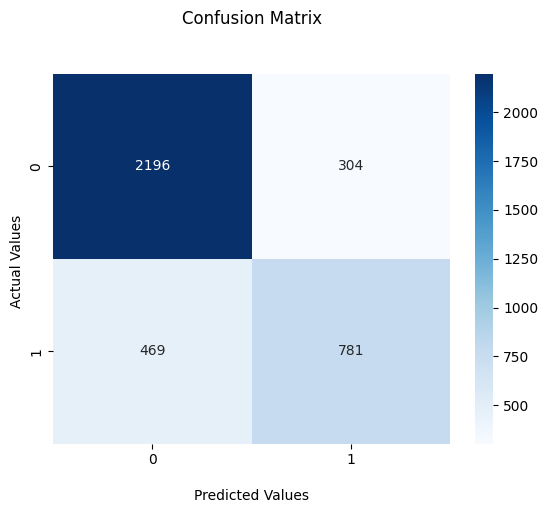

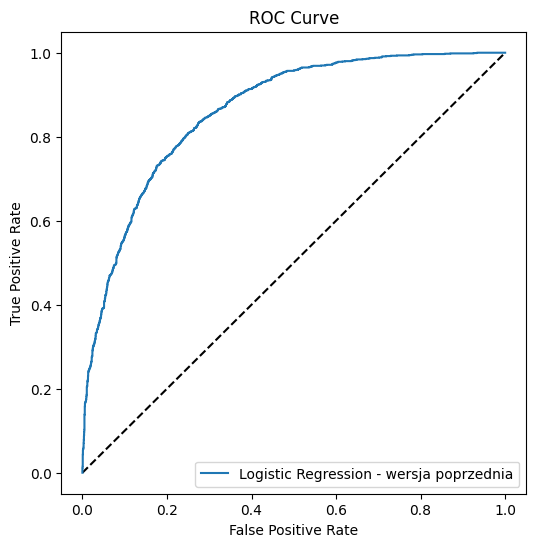

C:\Users\lukpy\AppData\Local\Temp\ipykernel_20048\2055394858.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


,Model,F1_score,AUC
0,Logistic Regression - wersja poprzednia,0.668951,0.862218


In [72]:
calculate_metrics(model_lr, 'Logistic Regression - wersja poprzednia', X_test_standardized, y_test)

# Model regresji logistycznej z użyciem pipeline'u 

In [73]:
# przygotowanie wartości numerycznych
num_preparation = Pipeline(steps=[
    ('logtransformer', PowerTransformer()),
    ('polynomial_features', PolynomialFeatures(degree=3)),
    ('scaler_1', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('scaler_2', StandardScaler())
])

In [74]:
model_pipeline_v1 = Pipeline(steps=[('preprocessor', num_preparation),
                                    ('model', LogisticRegression(max_iter=100, solver='saga'))])

In [75]:
model_pipeline_v1.fit(X_train, y_train)

D:\Kodilla\kurs_pythona\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('logtransformer', PowerTransformer()),
                                 ('polynomial_features',
                                  PolynomialFeatures(degree=3)),
                                 ('scaler_1', StandardScaler()),
                                 ('pca', PCA(n_components=0.95)),
                                 ('scaler_2', StandardScaler())])),
                ('model', LogisticRegression(solver='saga'))])

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2500
           1       0.82      0.81      0.81      1250

    accuracy                           0.88      3750
   macro avg       0.86      0.86      0.86      3750
weighted avg       0.88      0.88      0.88      3750



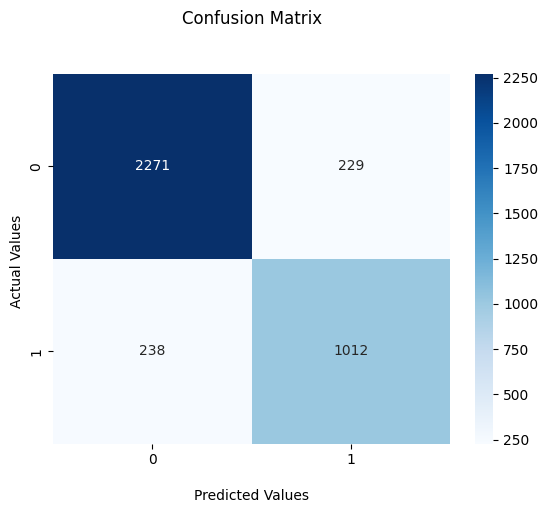

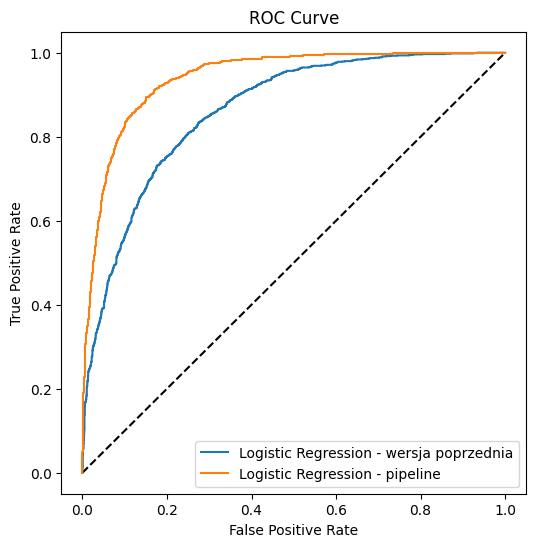

C:\Users\lukpy\AppData\Local\Temp\ipykernel_20048\2055394858.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


,Model,F1_score,AUC
0,Logistic Regression - wersja poprzednia,0.668951,0.862218
1,Logistic Regression - pipeline,0.812525,0.940986


In [76]:
calculate_metrics(model_pipeline_v1, 'Logistic Regression - pipeline', X_test, y_test)

# Model regresji logistycznej z użyciem pipeline'u z optymalizacją hiperparametrów

In [77]:
list(model_pipeline_v1.get_params().keys())

['memory',
 'steps',
 'verbose',
 'preprocessor',
 'model',
 'preprocessor__memory',
 'preprocessor__steps',
 'preprocessor__verbose',
 'preprocessor__logtransformer',
 'preprocessor__polynomial_features',
 'preprocessor__scaler_1',
 'preprocessor__pca',
 'preprocessor__scaler_2',
 'preprocessor__logtransformer__copy',
 'preprocessor__logtransformer__method',
 'preprocessor__logtransformer__standardize',
 'preprocessor__polynomial_features__degree',
 'preprocessor__polynomial_features__include_bias',
 'preprocessor__polynomial_features__interaction_only',
 'preprocessor__polynomial_features__order',
 'preprocessor__scaler_1__copy',
 'preprocessor__scaler_1__with_mean',
 'preprocessor__scaler_1__with_std',
 'preprocessor__pca__copy',
 'preprocessor__pca__iterated_power',
 'preprocessor__pca__n_components',
 'preprocessor__pca__n_oversamples',
 'preprocessor__pca__power_iteration_normalizer',
 'preprocessor__pca__random_state',
 'preprocessor__pca__svd_solver',
 'preprocessor__pca__tol',

In [78]:
params = {
    'preprocessor__polynomial_features__degree': [1, 2, 3],
    'preprocessor__pca__n_components': [0.85, 0.90, 0.95, 0.99],
    'model__l1_ratio': [0, 0.33, 0.67, 1],
    'model__penalty': ['none', 'l2', 'l1', 'elasticnet'],
    'model__C': [0.001, 0.01, 0.1, 0.3, 1]
}

In [79]:
grid_search = GridSearchCV(model_pipeline_v1, params, cv=4, n_jobs=-1, verbose=10, scoring='f1_macro')
grid_search.fit(X_train, y_train)
print('Wybrane hiperparametry: ', grid_search.best_params_)
model_v1 = grid_search.best_estimator_

Fitting 4 folds for each of 960 candidates, totalling 3840 fits


D:\Kodilla\kurs_pythona\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Wybrane hiperparametry:  {'model__C': 0.3, 'model__l1_ratio': 0, 'model__penalty': 'l1', 'preprocessor__pca__n_components': 0.99, 'preprocessor__polynomial_features__degree': 3}


D:\Kodilla\kurs_pythona\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2500
           1       0.82      0.81      0.82      1250

    accuracy                           0.88      3750
   macro avg       0.86      0.86      0.86      3750
weighted avg       0.88      0.88      0.88      3750



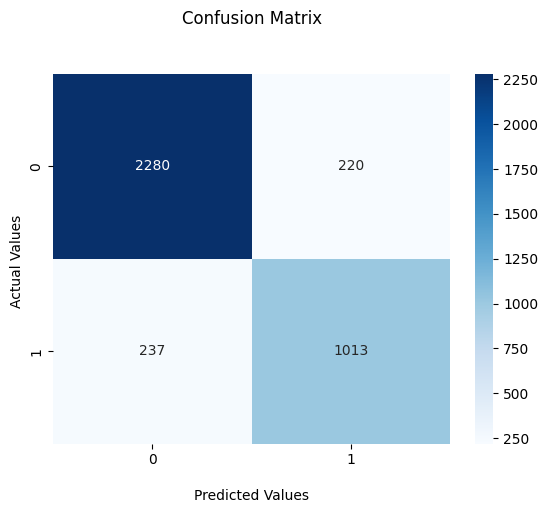

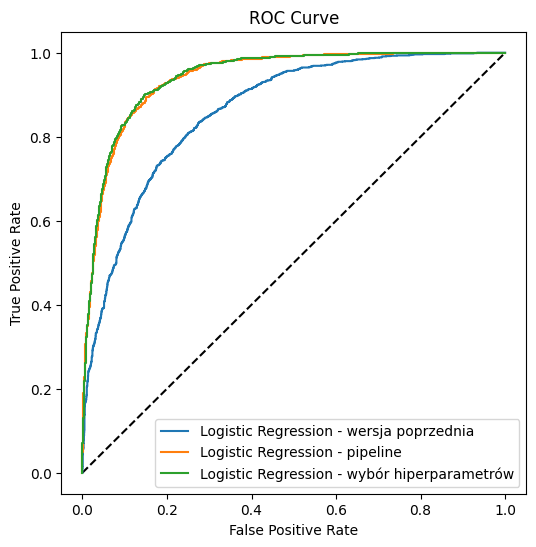

C:\Users\lukpy\AppData\Local\Temp\ipykernel_20048\2055394858.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


,Model,F1_score,AUC
0,Logistic Regression - wersja poprzednia,0.668951,0.862218
1,Logistic Regression - pipeline,0.812525,0.940986
2,Logistic Regression - wybór hiperparametrów,0.815948,0.942938


In [80]:
calculate_metrics(model_v1, 'Logistic Regression - wybór hiperparametrów', X_test, y_test)

# Model SVM z użyciem pipeline'u

In [81]:
model_pipeline_v2 = Pipeline(steps=[('preprocessor', num_preparation),
                                    ('model_svm', SVC(probability=True))])

In [82]:
model_pipeline_v2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('logtransformer', PowerTransformer()),
                                 ('polynomial_features',
                                  PolynomialFeatures(degree=3)),
                                 ('scaler_1', StandardScaler()),
                                 ('pca', PCA(n_components=0.95)),
                                 ('scaler_2', StandardScaler())])),
                ('model_svm', SVC(probability=True))])

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2500
           1       0.86      0.82      0.84      1250

    accuracy                           0.89      3750
   macro avg       0.88      0.88      0.88      3750
weighted avg       0.89      0.89      0.89      3750



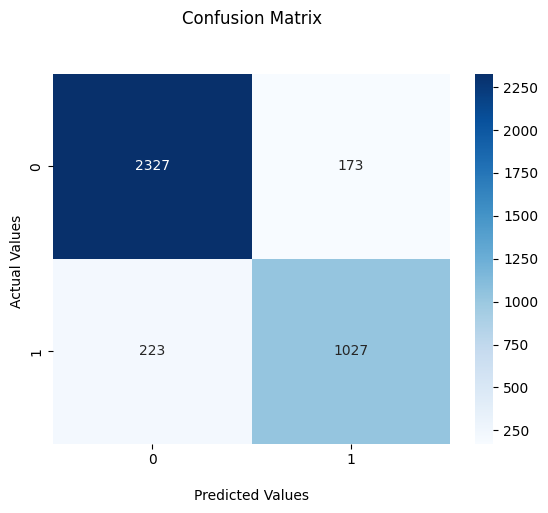

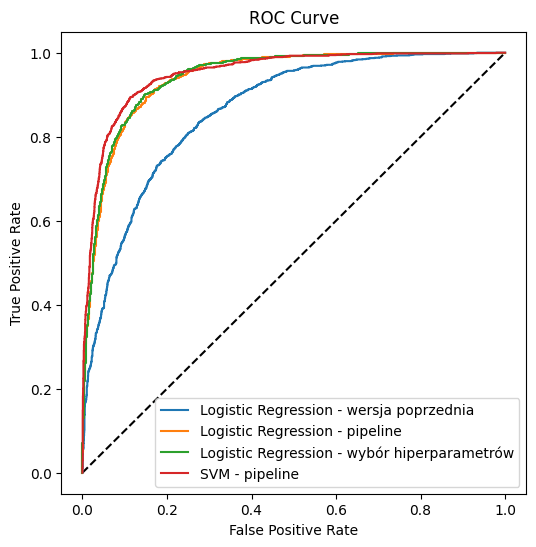

C:\Users\lukpy\AppData\Local\Temp\ipykernel_20048\2055394858.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


,Model,F1_score,AUC
0,Logistic Regression - wersja poprzednia,0.668951,0.862218
1,Logistic Regression - pipeline,0.812525,0.940986
2,Logistic Regression - wybór hiperparametrów,0.815948,0.942938
3,SVM - pipeline,0.838367,0.950852


In [83]:
calculate_metrics(model_pipeline_v2, 'SVM - pipeline', X_test, y_test)

# Model SVM z użyciem pipeline'u z optymalizacją hiperparametrów

In [84]:
list(model_pipeline_v2.get_params().keys())

['memory',
 'steps',
 'verbose',
 'preprocessor',
 'model_svm',
 'preprocessor__memory',
 'preprocessor__steps',
 'preprocessor__verbose',
 'preprocessor__logtransformer',
 'preprocessor__polynomial_features',
 'preprocessor__scaler_1',
 'preprocessor__pca',
 'preprocessor__scaler_2',
 'preprocessor__logtransformer__copy',
 'preprocessor__logtransformer__method',
 'preprocessor__logtransformer__standardize',
 'preprocessor__polynomial_features__degree',
 'preprocessor__polynomial_features__include_bias',
 'preprocessor__polynomial_features__interaction_only',
 'preprocessor__polynomial_features__order',
 'preprocessor__scaler_1__copy',
 'preprocessor__scaler_1__with_mean',
 'preprocessor__scaler_1__with_std',
 'preprocessor__pca__copy',
 'preprocessor__pca__iterated_power',
 'preprocessor__pca__n_components',
 'preprocessor__pca__n_oversamples',
 'preprocessor__pca__power_iteration_normalizer',
 'preprocessor__pca__random_state',
 'preprocessor__pca__svd_solver',
 'preprocessor__pca__t

In [85]:
params = {
    'preprocessor__polynomial_features__degree': [1, 2, 3],
    'model_svm__kernel': ['linear', 'rbf', 'sigmoid'],
    'model_svm__C': [0.1, 0.5, 1]
}

In [86]:
grid_search = GridSearchCV(model_pipeline_v2, params, cv=4, n_jobs=-1, verbose=10, scoring='f1_macro')
grid_search.fit(X_train, y_train)
print('Wybrane hiperparametry: ', grid_search.best_params_)
model_v2 = grid_search.best_estimator_

Fitting 4 folds for each of 27 candidates, totalling 108 fits
Wybrane hiperparametry:  {'model_svm__C': 1, 'model_svm__kernel': 'rbf', 'preprocessor__polynomial_features__degree': 2}


              precision    recall  f1-score   support

           0       0.92      0.93      0.92      2500
           1       0.85      0.85      0.85      1250

    accuracy                           0.90      3750
   macro avg       0.89      0.89      0.89      3750
weighted avg       0.90      0.90      0.90      3750



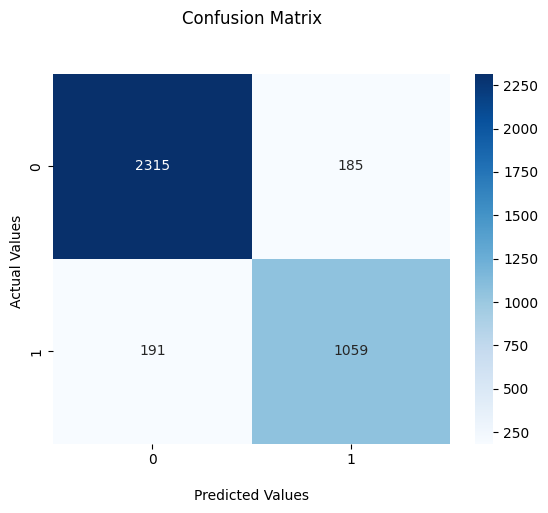

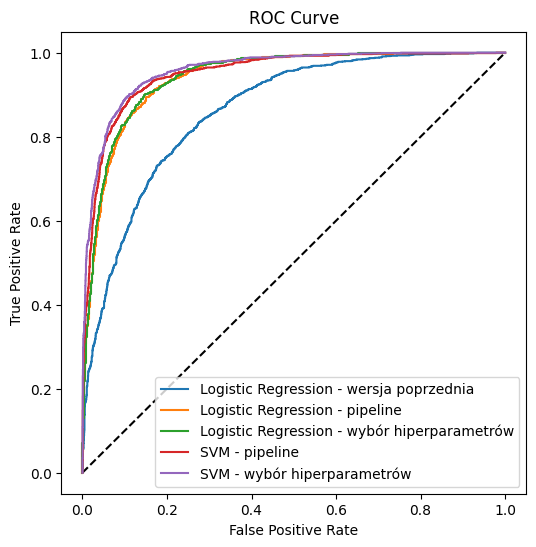

C:\Users\lukpy\AppData\Local\Temp\ipykernel_20048\2055394858.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


,Model,F1_score,AUC
0,Logistic Regression - wersja poprzednia,0.668951,0.862218
1,Logistic Regression - pipeline,0.812525,0.940986
2,Logistic Regression - wybór hiperparametrów,0.815948,0.942938
3,SVM - pipeline,0.838367,0.950852
4,SVM - wybór hiperparametrów,0.849238,0.958311


In [87]:
calculate_metrics(model_v2, 'SVM - wybór hiperparametrów', X_test, y_test)

Komentarz do wyników klasyfikacji osób chorych na cukrzycę:
- model w poprzednej wersji był szacowany regresją logistyczną, na bazie daych przeprocesowanych jedynie przez Standard Scaler;
- model regresji logistycznej z użyciem pipeline'u, w którym procesowanie danych było bardziej rozbudowane (dodatkowo Power Transformer, PCA oraz dodatkowe skalowanie danych po PCA) pozwolił mocno poprawić wynik w zakresie F1 na zbiorze testowtym. 
- wykonana następnie optymalizacja hiperparametrów regresji logistycznej przyniosła nieznaczną poprawę. Warto przy okazji zauważyć, że najlepsze wyniki zostały uzyskane dla regularyzacji L1 (Lasso). 
- w klasyfikacji wykorzystano kolejny estymator, SVM, który przyniósł kolejną, zauważalną poprawę wynikow klasyfikacji względem modeli oszacowanych na bazie regresji logistycznej.
- warto zauważyć, że pomimo znacząco mniejszej siatki hiperparametrów w przypadku SVM, ich optymalizacja pozwoliła na uzyskanie większej poprawy, niż optymalizacji bogatszej siatki hiperparametrów w przypadku regresji logistycznej.

# Dodatkowe rozwiązanie z użyciem Custom Transformera

In [88]:
def sigmoid(x):
    return(1 / (1 + math.exp(-x)))

In [89]:
class Sc(BaseEstimator, TransformerMixin):
    def __init__(self, column, typ):
        self.column = column
        self.typ = typ
                
    def fit(self, X, y = None):
        return self
    
    def transform(self,  X, y = None):
        X_transformed = X.copy()
        column = self.column
        for i in range (0, len(column)):
            if self.typ=="atan":
                X_transformed[column[i]] = X_transformed[column[i]].apply(lambda x: np.arctan(x))
            elif self.typ == 'sigmoid':
                X_transformed[column[i]] = X_transformed[column[i]].apply(lambda x: sigmoid(x))
        return X_transformed

In [90]:
transformer_Sc = Sc(['Pregnancies', 'BMI'], 'sigmoid')
display(X_train[['Pregnancies', 'BMI']])
display(transformer_Sc.fit_transform(X_train[['Pregnancies', 'BMI']]))


,Pregnancies,BMI
11619,0,37.061585
9513,0,37.570603
11665,9,36.260027
2959,0,37.009481
11088,4,28.644274
...,...,...
4316,0,44.130904
12020,0,30.773107
3171,1,46.095240
6748,9,35.759548


,Pregnancies,BMI
11619,0.500000,1.0
9513,0.500000,1.0
11665,0.999877,1.0
2959,0.500000,1.0
11088,0.982014,1.0
...,...,...
4316,0.500000,1.0
12020,0.500000,1.0
3171,0.731059,1.0
6748,0.999877,1.0


In [91]:
# przygotowanie wartości numerycznych
num_preparation = Pipeline(steps=[
    ('s_curve_transformer', Sc(['Pregnancies', 'BMI'], 'sigmoid')),
    ('logtransformer', PowerTransformer()),
    ('polynomial_features', PolynomialFeatures(degree=3)),
    ('scaler_1', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('scaler_2', StandardScaler())
])

In [92]:
model_pipeline_v3 = Pipeline(steps=[('preprocessor', num_preparation),
                                    ('model', LogisticRegression(max_iter=100, solver='saga'))])

In [93]:
model_pipeline_v3.fit(X_train, y_train)

D:\Kodilla\kurs_pythona\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\Kodilla\kurs_pythona\lib\site-packages\numpy\core\_methods.py:247: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
D:\Kodilla\kurs_pythona\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('s_curve_transformer',
                                  Sc(column=['Pregnancies', 'BMI'],
                                     typ='sigmoid')),
                                 ('logtransformer', PowerTransformer()),
                                 ('polynomial_features',
                                  PolynomialFeatures(degree=3)),
                                 ('scaler_1', StandardScaler()),
                                 ('pca', PCA(n_components=0.95)),
                                 ('scaler_2', StandardScaler())])),
                ('model', LogisticRegression(solver='saga'))])

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2500
           1       0.81      0.80      0.81      1250

    accuracy                           0.87      3750
   macro avg       0.85      0.85      0.85      3750
weighted avg       0.87      0.87      0.87      3750



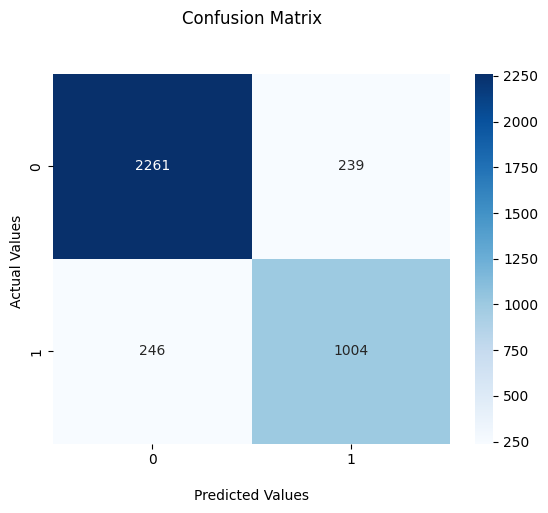

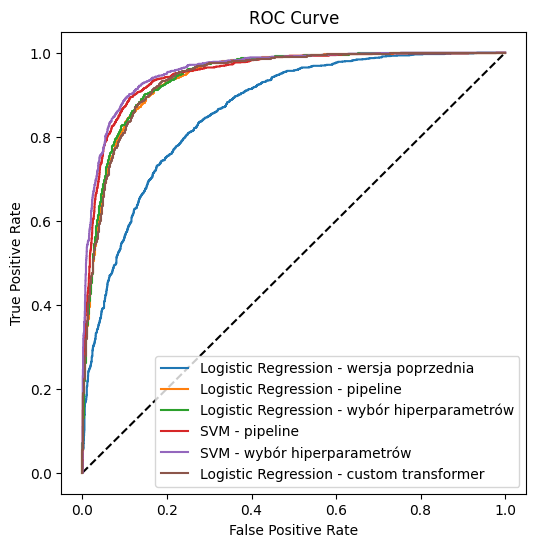

C:\Users\lukpy\AppData\Local\Temp\ipykernel_20048\2055394858.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


,Model,F1_score,AUC
0,Logistic Regression - wersja poprzednia,0.668951,0.862218
1,Logistic Regression - pipeline,0.812525,0.940986
2,Logistic Regression - wybór hiperparametrów,0.815948,0.942938
3,SVM - pipeline,0.838367,0.950852
4,SVM - wybór hiperparametrów,0.849238,0.958311
5,Logistic Regression - custom transformer,0.805455,0.940395


In [94]:
calculate_metrics(model_pipeline_v3, 'Logistic Regression - custom transformer', X_test, y_test)

In [95]:
list(model_pipeline_v3.get_params().keys())

['memory',
 'steps',
 'verbose',
 'preprocessor',
 'model',
 'preprocessor__memory',
 'preprocessor__steps',
 'preprocessor__verbose',
 'preprocessor__s_curve_transformer',
 'preprocessor__logtransformer',
 'preprocessor__polynomial_features',
 'preprocessor__scaler_1',
 'preprocessor__pca',
 'preprocessor__scaler_2',
 'preprocessor__s_curve_transformer__column',
 'preprocessor__s_curve_transformer__typ',
 'preprocessor__logtransformer__copy',
 'preprocessor__logtransformer__method',
 'preprocessor__logtransformer__standardize',
 'preprocessor__polynomial_features__degree',
 'preprocessor__polynomial_features__include_bias',
 'preprocessor__polynomial_features__interaction_only',
 'preprocessor__polynomial_features__order',
 'preprocessor__scaler_1__copy',
 'preprocessor__scaler_1__with_mean',
 'preprocessor__scaler_1__with_std',
 'preprocessor__pca__copy',
 'preprocessor__pca__iterated_power',
 'preprocessor__pca__n_components',
 'preprocessor__pca__n_oversamples',
 'preprocessor__pca

In [96]:
params = {
    'preprocessor__s_curve_transformer__typ': ['atan', 'sigmoid'],
    'preprocessor__polynomial_features__degree': [1, 2],
    'preprocessor__pca__n_components': [0.90, 0.95],
    'model__l1_ratio': [0, 0.5, 1],
    'model__penalty': ['none', 'l2', 'l1', 'elasticnet'],
    'model__C': [0.01, 0.3, 1]
}

In [97]:
grid_search = GridSearchCV(model_pipeline_v3, params, cv=4, n_jobs=-1, verbose=10, scoring='f1_macro')
grid_search.fit(X_train, y_train)
print('Wybrane hiperparametry: ', grid_search.best_params_)
model_v3 = grid_search.best_estimator_

Fitting 4 folds for each of 288 candidates, totalling 1152 fits


D:\Kodilla\kurs_pythona\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\Kodilla\kurs_pythona\lib\site-packages\numpy\core\_methods.py:247: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
D:\Kodilla\kurs_pythona\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Wybrane hiperparametry:  {'model__C': 0.3, 'model__l1_ratio': 0, 'model__penalty': 'l2', 'preprocessor__pca__n_components': 0.95, 'preprocessor__polynomial_features__degree': 2, 'preprocessor__s_curve_transformer__typ': 'sigmoid'}


              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2500
           1       0.81      0.80      0.81      1250

    accuracy                           0.87      3750
   macro avg       0.85      0.85      0.85      3750
weighted avg       0.87      0.87      0.87      3750



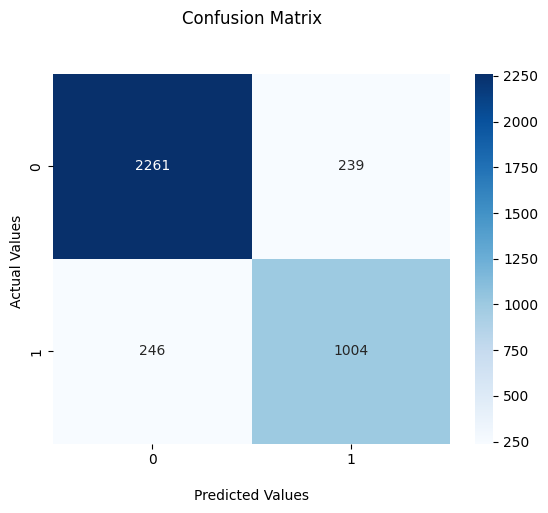

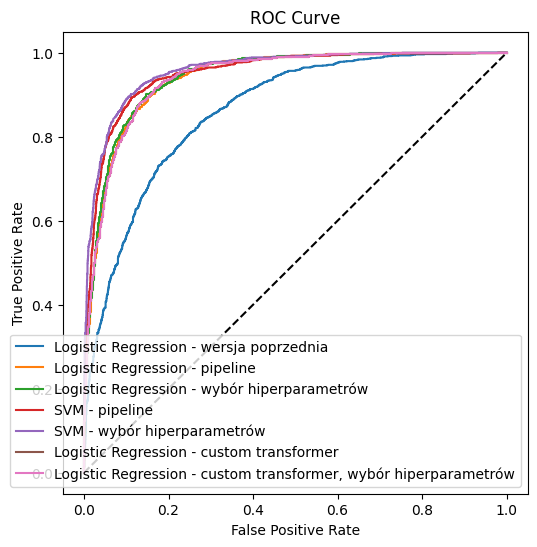

C:\Users\lukpy\AppData\Local\Temp\ipykernel_20048\2055394858.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


,Model,F1_score,AUC
0,Logistic Regression - wersja poprzednia,0.668951,0.862218
1,Logistic Regression - pipeline,0.812525,0.940986
2,Logistic Regression - wybór hiperparametrów,0.815948,0.942938
3,SVM - pipeline,0.838367,0.950852
4,SVM - wybór hiperparametrów,0.849238,0.958311
5,Logistic Regression - custom transformer,0.805455,0.940395
6,"Logistic Regression - custom transformer, wybó...",0.805455,0.940395


In [98]:
calculate_metrics(model_pipeline_v3, 'Logistic Regression - custom transformer, wybór hiperparametrów', X_test, y_test)